<a href="https://colab.research.google.com/github/orca-code/hello-colabratory/blob/main/hello_colabratory.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#github Save testing
import cv2, matplotlib
import numpy as np
import matplotlib.pyplot as plt

In [2]:
#イメージを読み込む
img_path = '/content/drive/MyDrive/Colab Notebooks/python-pictures/colab-pic.jpg'
img = cv2.imread(img_path)
#show img format
print(img)

[[[108 124 147]
  [108 124 147]
  [109 121 145]
  ...
  [105  59 209]
  [105  62 213]
  [105  64 215]]

 [[108 124 147]
  [108 124 147]
  [109 121 145]
  ...
  [104  57 209]
  [109  64 214]
  [106  64 213]]

 [[108 124 147]
  [108 124 147]
  [109 120 147]
  ...
  [104  59 210]
  [107  62 209]
  [109  62 208]]

 ...

 [[108 179 129]
  [108 179 129]
  [108 179 129]
  ...
  [104  34 224]
  [103  34 225]
  [103  34 225]]

 [[110 184 132]
  [110 184 132]
  [110 184 132]
  ...
  [104  35 226]
  [104  34 228]
  [104  34 228]]

 [[106 181 127]
  [106 181 127]
  [106 180 128]
  ...
  [104  35 226]
  [104  34 229]
  [104  34 229]]]


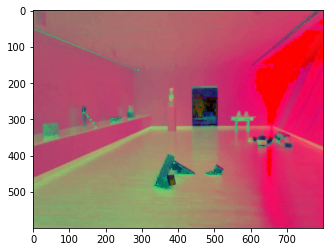

In [3]:
#convert image to BGR color to RGB
#cv2はBGRで読み込まれるが、MatplotLibはRGBに変更する必要がある。そのため変換が必須
img = cv2.cvtColor(img,cv2.COLOR_BGR2RGB)
#matplotLIbでイメージを表す
plt.imshow(img)

[[129 129 127 ... 109 112 114]
 [129 129 127 ... 108 114 113]
 [129 129 127 ... 109 111 111]
 ...
 [156 156 156 ...  99  99  99]
 [160 160 160 ... 100 100 100]
 [156 156 156 ... 100 100 100]]


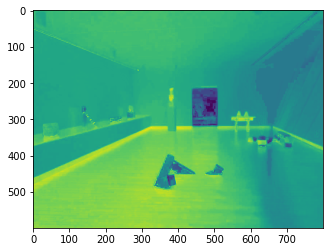

In [4]:
gray_img = cv2.cvtColor(img,cv2.COLOR_RGB2GRAY)

#gray イメージ
print(gray_img)
plt.imshow(gray_img)

# **画像の平均**

[180.01319792  88.59300208 101.2398875 ]
[180  88 101]


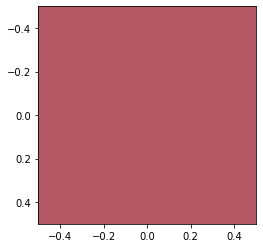

In [5]:


#画像の平均のRGB値を取得する（行方向の各RGB値の取得）
average_color_per_row = np.average(img,axis=0)

#これを縦方向にも行う
average_color = np.average(average_color_per_row,axis = 0)
print(average_color)
average_color = np.uint8(average_color)
print(average_color)

#平均の色は何色だった？
plt.imshow([[average_color]])

#np.arrayの使い方

In [6]:
##np.averageの使い方

import numpy as np
a = np.array([33,45,54,23,25,55,32,76])
np.average(a)

a = a.reshape(2,4)
print(a)
#軸が指定されてなかったらとりあえず全部の数字の合計になる
np.average(a)

#axis = 0 縦軸方向の平均
print(np.average(a,axis = 0))
#axis = 1横軸方向の平均
print(np.average(a,axis = 1))

b = np.array([[[1,2,3],[2,3,4],[3,4,5]],[[4,5,6],[5,6,7],[7,8,9]]])
print(b)
print(np.average(b,axis = 0))
print(np.average(b,axis = 1))
print(np.average(b, axis = 2))



[[33 45 54 23]
 [25 55 32 76]]
[29.  50.  43.  49.5]
[38.75 47.  ]
[[[1 2 3]
  [2 3 4]
  [3 4 5]]

 [[4 5 6]
  [5 6 7]
  [7 8 9]]]
[[2.5 3.5 4.5]
 [3.5 4.5 5.5]
 [5.  6.  7. ]]
[[2.         3.         4.        ]
 [5.33333333 6.33333333 7.33333333]]
[[2. 3. 4.]
 [5. 6. 8.]]


numpyのaxisがわからなくなったらこれを読め

https://deepage.net/features/numpy-axis.html

memo-colabratoryのショートカット

https://qiita.com/t_m_t_m/items/ab20e8c4459c4952ab7d



#**閾値処理**

# **パイソンメモ**

_←アンダースコアをつけると戻り値が無視される
_,threshold_img = cv2.threshold(gray_img,60,255,cv2.THRESH_BINARY)

↑

タプルの第二引数を取得するという意味

ややこ

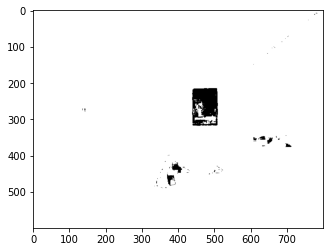

In [7]:
gray_img = cv2.cvtColor(img,cv2.COLOR_RGB2GRAY)

#
_,threshold_img = cv2.threshold(gray_img,60,255,cv2.THRESH_BINARY)



threshold_img = cv2.cvtColor(threshold_img,cv2.COLOR_GRAY2RGB)

plt.imshow(threshold_img)

HSVの色相チャンネルに関して


閾値よりも低い値を探さなくてもcv2.inRangeを使えば

一定の色相の領域に収まる部分を画像から見つけることができる。

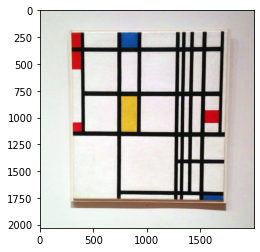

[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


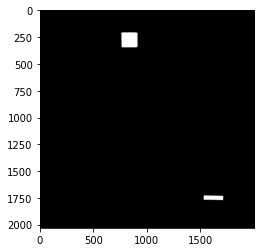

In [12]:
#新しい写真をpietとおく
piet = cv2.imread('/content/drive/MyDrive/Colab Notebooks/python-pictures/piet.png')
#元の画像
original_piet = cv2.cvtColor(piet,cv2.COLOR_BGR2RGB)
plt.imshow(original_piet)
plt.show()


piet_hsv = cv2.cvtColor(piet,cv2.COLOR_BGR2HSV)
#print(piet_hsv)
blue_min = np.array([100,100,100],np.uint8)
blue_max = np.array([140,255,255],np.uint8)
threshold_blue_img = cv2.inRange(piet_hsv,blue_min,blue_max)
print(threshold_blue_img)


threshold_blue_img = cv2.cvtColor(threshold_blue_img,cv2.COLOR_GRAY2RGB)

plt.imshow(threshold_blue_img)

演習： どうやったら、この絵から赤、または黄の部分を取り出せるでしょうか。また、もし色の全色相を0から255で表すことができるとしたら、赤、または黄にどの範囲を使えばいいでしょうか。

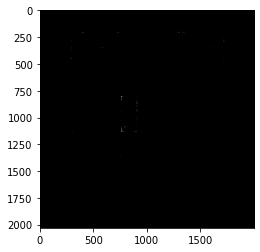

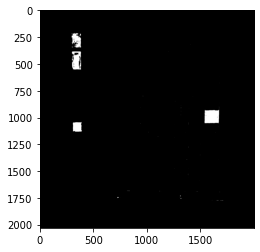

In [27]:
#print(piet_hsv)
yellow_min = np.array([25,50,50],np.uint8)
yellow_max = np.array([35,255,255],np.uint8)


threshold_yellow_img = cv2.inRange(piet_hsv,yellow_min,yellow_max)
threshold_yellow_img = cv2.cvtColor(threshold_yellow_img,cv2.COLOR_GRAY2RGB)

plt.imshow(threshold_yellow_img)
plt.show()


red_min = np.array([159,50,70],np.uint8)
red_max = np.array([180,255,255],np.uint8)


threshold_red_img = cv2.inRange(piet_hsv,red_min,red_max)
threshold_red_img = cv2.cvtColor(threshold_red_img,cv2.COLOR_GRAY2RGB)

plt.imshow(threshold_red_img)
plt.show()

#範囲を調整する方法を勉強したい。



**2値化閾値を使ったマスキング**